# Imports

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing Dataset

In [23]:
df = pd.read_csv(
    r"/media/jeyanth-s/DevDrive/AI_Workspace/projects/Heart Disease Project Repository/Heart-Disease-Prediction---Cognitives/Datasets/dataset4.csv",
    delimiter=";")

In [24]:
print(df.head())
print(df.count())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64


In [25]:
df.columns = [
    "id", "age_days", "gender", "height_cm", "weight_kg",
    "ap_hi", "ap_lo", "cholesterol", "gluc",
    "smoke", "alco", "active", "cardio"
]


# Data Cleaning

In [26]:
df["age_years"] = (df["age_days"] / 365).astype(int)


In [27]:
# Valid height and weight range (based on human physiology)
df = df[(df["height_cm"] > 100) & (df["height_cm"] < 250)]
df = df[(df["weight_kg"] > 30) & (df["weight_kg"] < 250)]

# Valid blood pressure ranges
df = df[(df["ap_hi"] > 80) & (df["ap_hi"] < 250)]
df = df[(df["ap_lo"] > 40) & (df["ap_lo"] < 200)]
df = df[df["ap_hi"] > df["ap_lo"]]  # Systolic should be higher


In [28]:
cat_cols = ["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]
df[cat_cols] = df[cat_cols].astype(int)


In [29]:
df["bmi"] = df["weight_kg"] / ((df["height_cm"] / 100) ** 2)


In [30]:
df["pulse_pressure"] = df["ap_hi"] - df["ap_lo"]


In [31]:
df["hypertension"] = ((df["ap_hi"] >= 140) | (df["ap_lo"] >= 90)).astype(int)


In [32]:
print(df.head())
print(df.isnull().sum())


   id  age_days  gender  height_cm  weight_kg  ap_hi  ap_lo  cholesterol  \
0   0     18393       2        168       62.0    110     80            1   
1   1     20228       1        156       85.0    140     90            3   
2   2     18857       1        165       64.0    130     70            3   
3   3     17623       2        169       82.0    150    100            1   
4   4     17474       1        156       56.0    100     60            1   

   gluc  smoke  alco  active  cardio  age_years        bmi  pulse_pressure  \
0     1      0     0       1       0         50  21.967120              30   
1     1      0     0       1       1         55  34.927679              50   
2     1      0     0       0       1         51  23.507805              60   
3     1      0     0       1       1         48  28.710479              50   
4     1      0     0       0       0         47  23.011177              40   

   hypertension  
0             0  
1             1  
2             0  
3 

# EDA

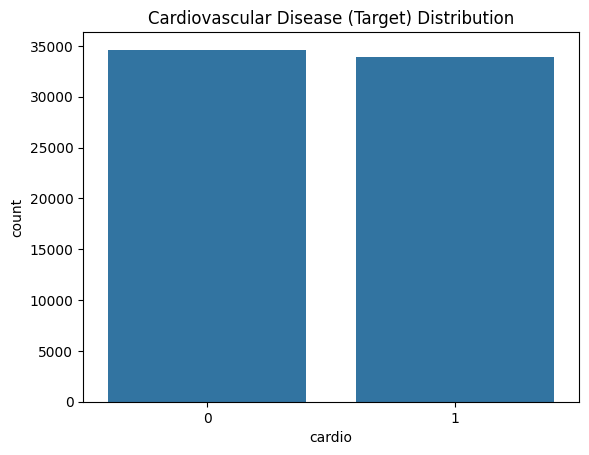

cardio
0    0.504938
1    0.495062
Name: proportion, dtype: float64

In [33]:
sns.countplot(x="cardio", data=df)
plt.title("Cardiovascular Disease (Target) Distribution")
plt.show()

df["cardio"].value_counts(normalize=True)


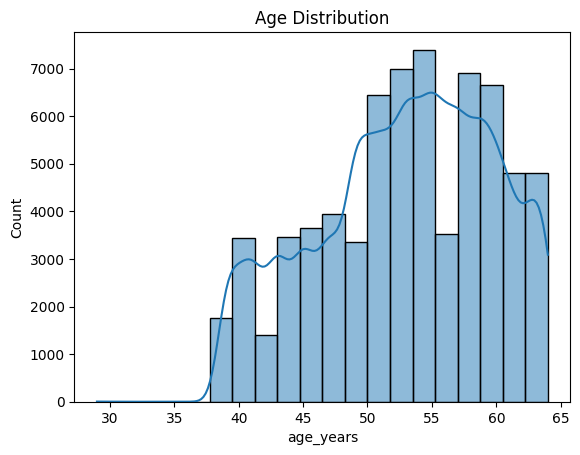

In [34]:
sns.histplot(df["age_years"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


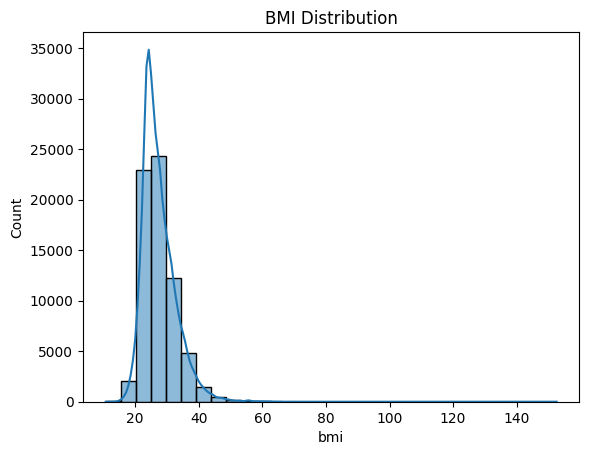

In [35]:
sns.histplot(df["bmi"], bins=30, kde=True)
plt.title("BMI Distribution")
plt.show()


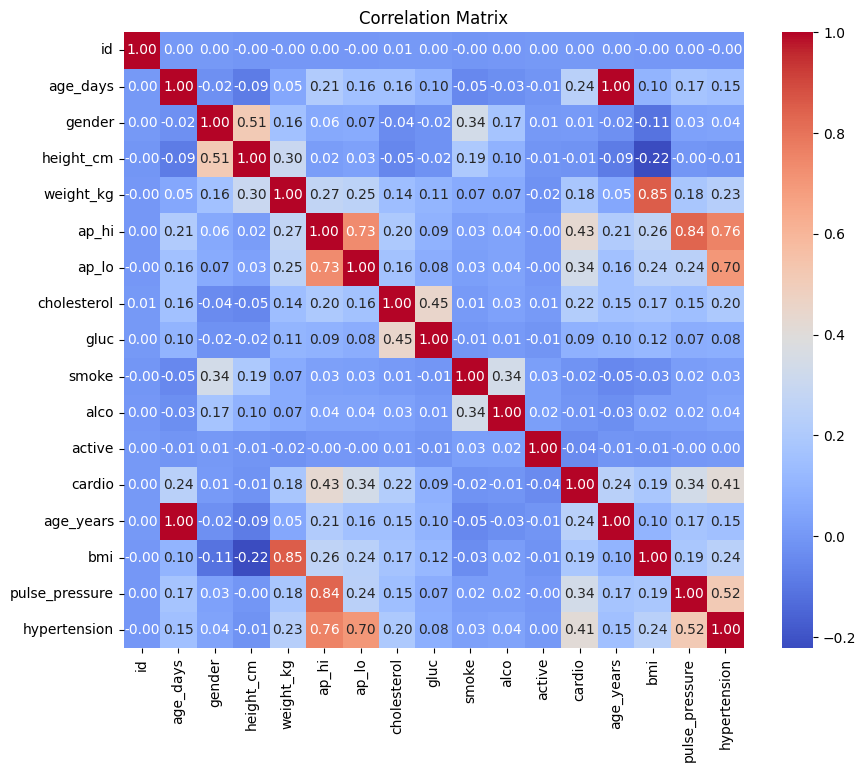

In [36]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


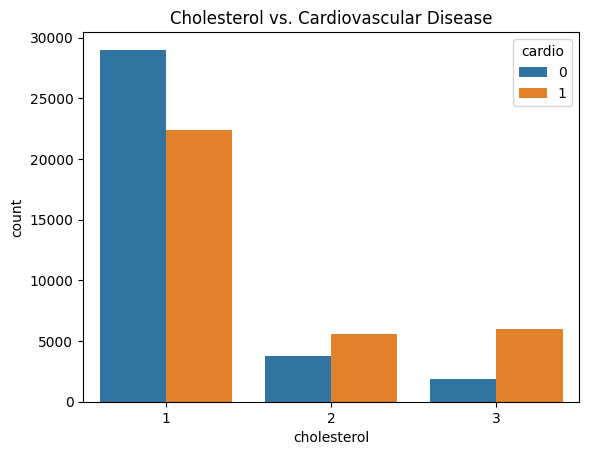

In [37]:
sns.countplot(x="cholesterol", hue="cardio", data=df)
plt.title("Cholesterol vs. Cardiovascular Disease")
plt.show()


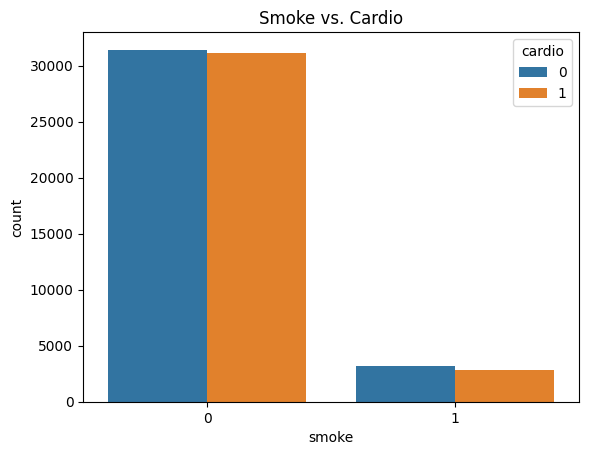

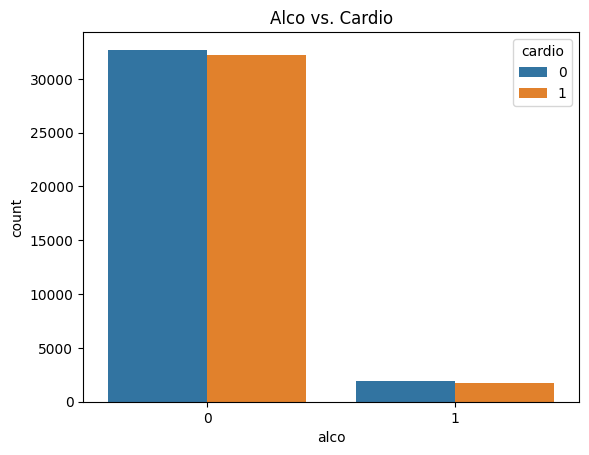

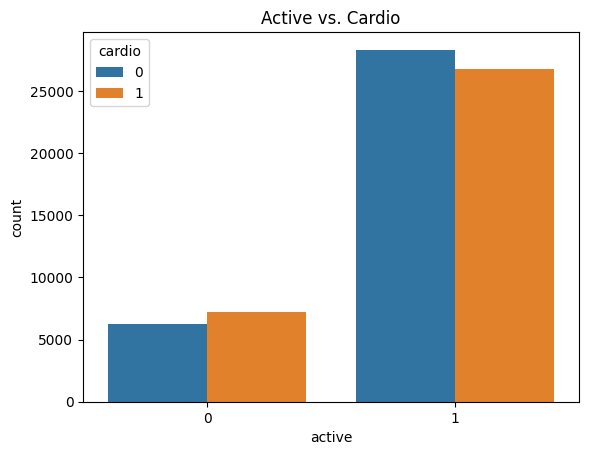

In [38]:
for col in ["smoke", "alco", "active"]:
    sns.countplot(x=col, hue="cardio", data=df)
    plt.title(f"{col.capitalize()} vs. Cardio")
    plt.show()


# Model Development

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Features and target
X = df.drop(columns=["id", "age_days", "cardio"])
y = df["cardio"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


/media/jeyanth-s/DevDrive/AI_Workspace/envs/pytorch-env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:27:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/media/jeyanth-s/DevDrive/AI_Workspace/envs/pytorch-env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:27:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/media/jeyanth-s/DevDrive/AI_Workspace/envs/pytorch-env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [12:27:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "

📊 XGBoost AUC: 0.7958352658773403
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6923
           1       0.76      0.68      0.72      6788

    accuracy                           0.73     13711
   macro avg       0.74      0.73      0.73     13711
weighted avg       0.74      0.73      0.73     13711



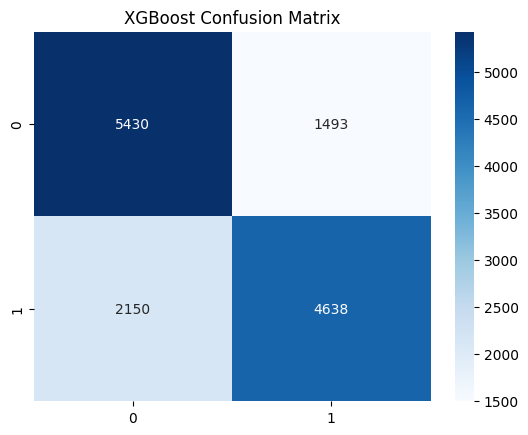

In [40]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    tree_method="gpu_hist",
    predictor="gpu_predictor",
    gpu_id=0,
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print("📊 XGBoost AUC:", roc_auc_score(y_test, xgb_proba))
print(classification_report(y_test, xgb_pred))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()


[LightGBM] [Info] Number of positive: 27151, number of negative: 27693
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 54844, number of used features: 14
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 8 dense feature groups (0.42 MB) transferred to GPU in 0.000670 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495059 -> initscore=-0.019766
[LightGBM] [Info] Start training from score -0.019766
📊 LightGBM AUC: 0.8019266843094564
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6923
           1       0.76      0.69      0.72      6788


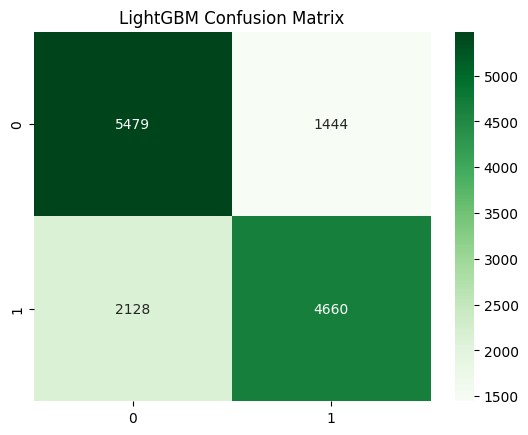

In [41]:
import lightgbm as lgb

# Initialize LightGBM model with GPU
lgb_model = lgb.LGBMClassifier(
    device="gpu",               # GPU usage
    gpu_platform_id=0,
    gpu_device_id=0,
    objective="binary",
    metric="auc",
    boosting_type="gbdt",
    random_state=42
)

# Train
lgb_model.fit(X_train, y_train)

# Predict
lgb_pred = lgb_model.predict(X_test)
lgb_proba = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
print("📊 LightGBM AUC:", roc_auc_score(y_test, lgb_proba))
print(classification_report(y_test, lgb_pred))

sns.heatmap(confusion_matrix(y_test, lgb_pred), annot=True, fmt='d', cmap='Greens')
plt.title("LightGBM Confusion Matrix")
plt.show()


0:	learn: 0.6842760	test: 0.6843817	best: 0.6843817 (0)	total: 15.4ms	remaining: 15.4s
100:	learn: 0.5403443	test: 0.5427113	best: 0.5427113 (100)	total: 312ms	remaining: 2.78s
200:	learn: 0.5349320	test: 0.5399073	best: 0.5399065 (198)	total: 667ms	remaining: 2.65s
300:	learn: 0.5319934	test: 0.5391589	best: 0.5391589 (300)	total: 923ms	remaining: 2.14s
400:	learn: 0.5296213	test: 0.5390086	best: 0.5389993 (399)	total: 1.18s	remaining: 1.76s
500:	learn: 0.5273465	test: 0.5389281	best: 0.5389281 (500)	total: 1.53s	remaining: 1.52s
bestTest = 0.5388897088
bestIteration = 509
Shrink model to first 510 iterations.
📊 CatBoost AUC: 0.8023485633831733
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6923
           1       0.76      0.69      0.72      6788

    accuracy                           0.74     13711
   macro avg       0.74      0.74      0.74     13711
weighted avg       0.74      0.74      0.74     13711



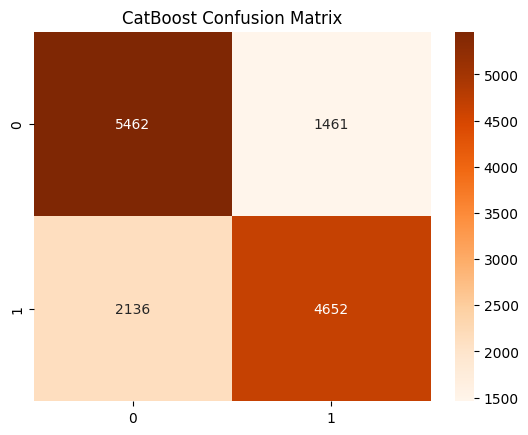

In [42]:
from catboost import CatBoostClassifier

# Initialize CatBoost with GPU
cat_model = CatBoostClassifier(
    task_type="GPU",
    devices="0",                  # GPU index
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    early_stopping_rounds=50,
    verbose=100,
    random_seed=42
)

# Train
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Predict
cat_pred = cat_model.predict(X_test)
cat_proba = cat_model.predict_proba(X_test)[:, 1]

# Evaluate
print("📊 CatBoost AUC:", roc_auc_score(y_test, cat_proba))
print(classification_report(y_test, cat_pred))

sns.heatmap(confusion_matrix(y_test, cat_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("CatBoost Confusion Matrix")
plt.show()


📊 Ensemble AUC Score: 0.8017376680994092
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6923
           1       0.76      0.69      0.72      6788

    accuracy                           0.74     13711
   macro avg       0.74      0.74      0.74     13711
weighted avg       0.74      0.74      0.74     13711



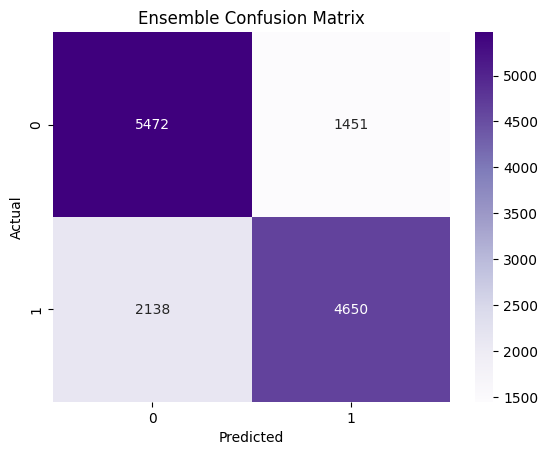

In [43]:
import numpy as np
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Average predicted probabilities
ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3

# Convert probabilities to class labels (threshold = 0.5)
ensemble_pred = (ensemble_proba >= 0.5).astype(int)

# Evaluate
print("📊 Ensemble AUC Score:", roc_auc_score(y_test, ensemble_proba))
print(classification_report(y_test, ensemble_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, ensemble_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Ensemble Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [45]:
path = "/media/jeyanth-s/DevDrive/AI_Workspace/projects/Heart Disease Project Repository/Heart-Disease-Prediction---Cognitives/Models"
xgb_model.save_model(path+"/xgboost_model.json")

In [46]:
lgb_model.booster_.save_model(path+"/lightgbm_model.txt")

In [47]:
cat_model.save_model(path+"/catboost_model.cbm")

# Testing the model

In [53]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# === Load Models ===
xgb_model = xgb.XGBClassifier()
xgb_model.load_model(path+"/xgboost_model.json")

lgb_booster = lgb.Booster(model_file=path+"/lightgbm_model.txt")
cat_model = CatBoostClassifier()
cat_model.load_model(path+"/catboost_model.cbm")

# === Raw Sample Input ===
sample_input = pd.DataFrame([{
    "age": 22000,
    "gender": 1,
    "height": 165,
    "weight": 78.0,
    "ap_hi": 140,
    "ap_lo": 90,
    "cholesterol": 2,
    "gluc": 1,
    "smoke": 0,
    "alco": 0,
    "active": 1
}])

# === Preprocess Function ===
def preprocess(sample_df):
    df = sample_df.copy()
    df["age_years"] = (df["age"] / 365).astype(int)
    df["bmi"] = df["weight"] / ((df["height"] / 100) ** 2)
    df["pulse_pressure"] = df["ap_hi"] - df["ap_lo"]
    df["hypertension"] = ((df["ap_hi"] >= 140) | (df["ap_lo"] >= 90)).astype(int)
    df.rename(columns={"height": "height_cm", "weight": "weight_kg"}, inplace=True)
    feature_cols = [
        "gender", "height_cm", "weight_kg", "ap_hi", "ap_lo", "cholesterol", "gluc",
        "smoke", "alco", "active", "age_years", "bmi", "pulse_pressure", "hypertension"
    ]
    return df[feature_cols]

# === Preprocess Input ===
sample_processed = preprocess(sample_input)

# === Predict Probabilities ===
xgb_proba = xgb_model.predict_proba(sample_processed)[:, 1]
lgb_proba = lgb_booster.predict(sample_processed)
cat_proba = cat_model.predict_proba(sample_processed)[:, 1]

# === Ensemble ===
ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3
ensemble_pred = (ensemble_proba >= 0.5).astype(int)

# === Output ===
print("📊 Ensemble Probability:", ensemble_proba[0])
print("🧠 Predicted Class:", ensemble_pred[0])


📊 Ensemble Probability: 0.8441302794950025
🧠 Predicted Class: 1
